In [2]:
import script_utils as utils
import os
import json

MODEL = "custom-1"

tasks = utils.get_tasks(MODEL, remove_corrupted=True)

Removed corrupted task dir: D:\Projects\OSWorld-MA\results\pyautogui\screenshot\custom-1\multi_apps\02ce9a50-7af2-47ed-8596-af0c230501f8


2026-01-21 22:25:19.000 | WARNING  | script_utils:get_tasks:70 - Warning: Only 336 tasks found, but 351 expected from ground truth.


Total success rate: 83.92% (287/342)


,success_rate_%
domain,
vlc,100.000000
vs_code,95.454545
thunderbird,92.857143
os,90.909091
chrome,86.363636
libreoffice_impress,85.106383
libreoffice_calc,84.782609
gimp,78.260870
libreoffice_writer,77.272727


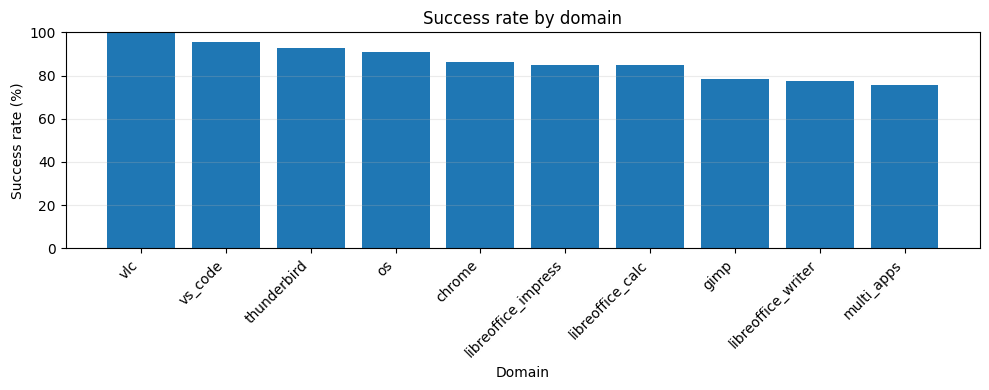

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(tasks).copy()
if df.empty:
    raise ValueError("No tasks found — run Cell 3 first.")

if "domain" not in df.columns or "success" not in df.columns:
    raise ValueError(f"Expected columns ['domain', 'success'] but got: {list(df.columns)}")

df["success_bool"] = df["success"].astype(bool)

# Total success rate (%)
total_success_rate = df["success_bool"].mean() * 100
print(f"Total success rate: {total_success_rate:.2f}% ({df['success_bool'].sum()}/{len(df)})")

# Success rate (%) by domain
success_rate = (
    df.groupby("domain")["success_bool"]
      .mean()
      .mul(100)
      .sort_values(ascending=False)
)

display(success_rate.rename("success_rate_%").to_frame())

plt.figure(figsize=(10, 4))
plt.bar(success_rate.index.astype(str), success_rate.values)
plt.ylabel("Success rate (%)")
plt.xlabel("Domain")
plt.ylim(0, 100)
plt.title("Success rate by domain")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", alpha=0.25)
plt.tight_layout()
plt.show()